In [1]:
import june_gloom
data_dir = "/home/samco/_ds/ksmo/raw_data/"
#june_gloom.wug_data_concat(data_dir)
june_gloom.init(data_dir)
june_gloom.weather_data_features()
from june_gloom import (combined_weather_df, pt_june_gloom_df, fog_days_df, rain_days_df)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(combined_weather_df.head(3))
print('\n\n')
print(pt_june_gloom_df.head(3))
print('\n\n')
print(fog_days_df.head(3))
print('\n\n')
print(rain_days_df.head(3))

        date  fog  rain  meanwdird  meantempm  meandewptm  meanpressurem  \
0 1997-01-01    0     1        236         18          14           1020   
1 1997-01-02    1     0        207         16          16           1017   
2 1997-01-03    1     0        251         17          11           1015   

   maxhumidity  minhumidity  maxtempm  mintempm  maxdewptm  mindewptm  \
0          100           64        20        15         16         13   
1          100           94        17        15         16         15   
2          100           42        19        15         15          4   

   maxpressurem  minpressurem  precipm  year  month  day  dayofweek  
0          1022          1019      0.0  1997      1    1          2  
1          1020          1016      0.0  1997      1    2          3  
2          1017          1015      0.0  1997      1    3          4  



day     1    2    3    4    5    6    7    8    9    10 ...    22   23   24  \
year  1997 1997 1997 1997 1997 1997 1997

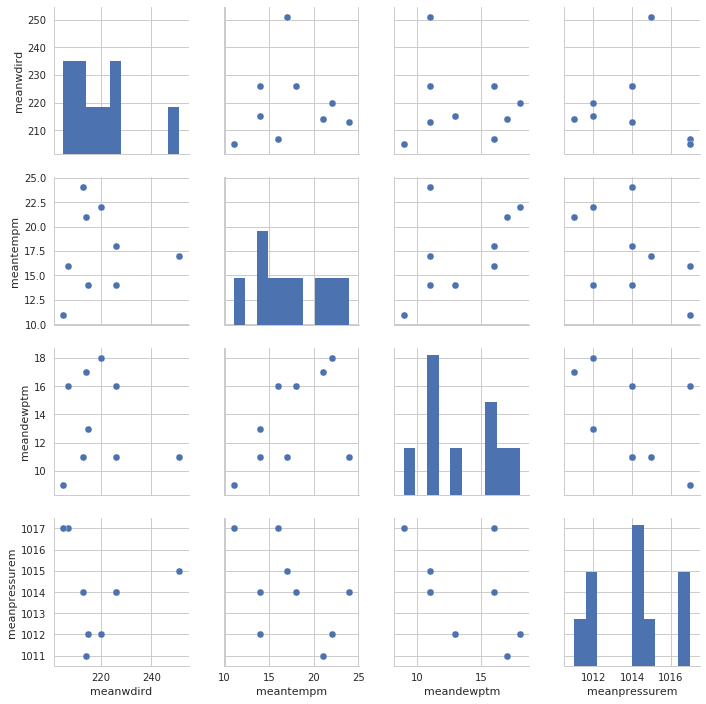

In [4]:
sns.set(style='whitegrid')
sns.pairplot(fog_days_df)

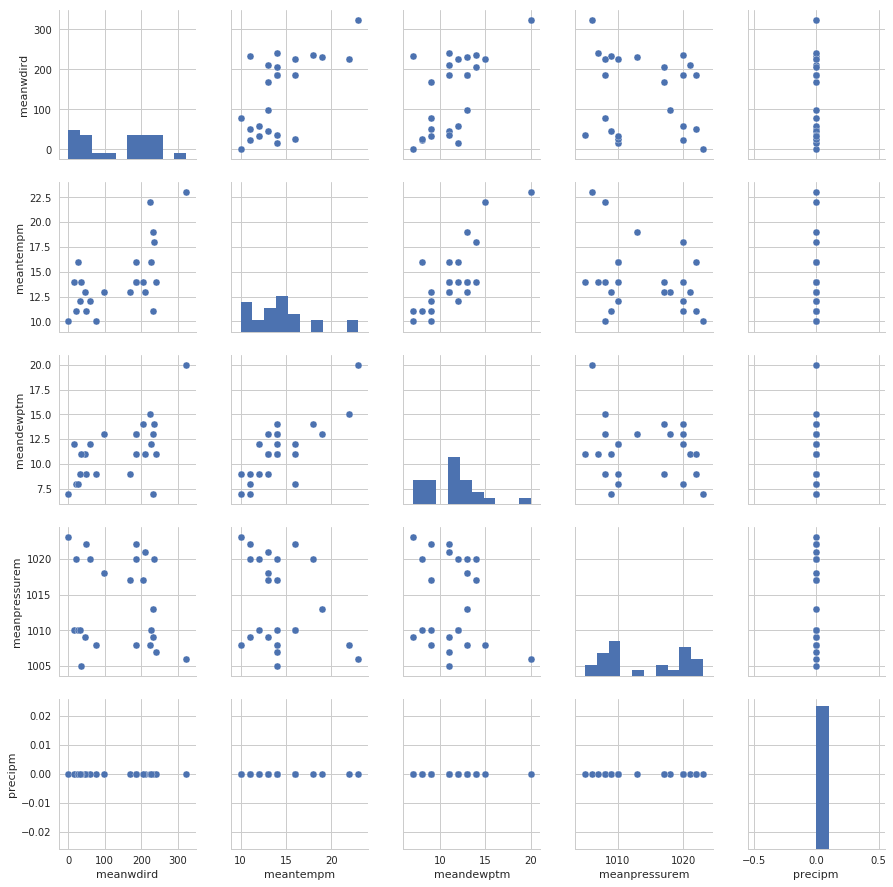

In [5]:
sns.set(style='whitegrid')
sns.pairplot(rain_days_df)

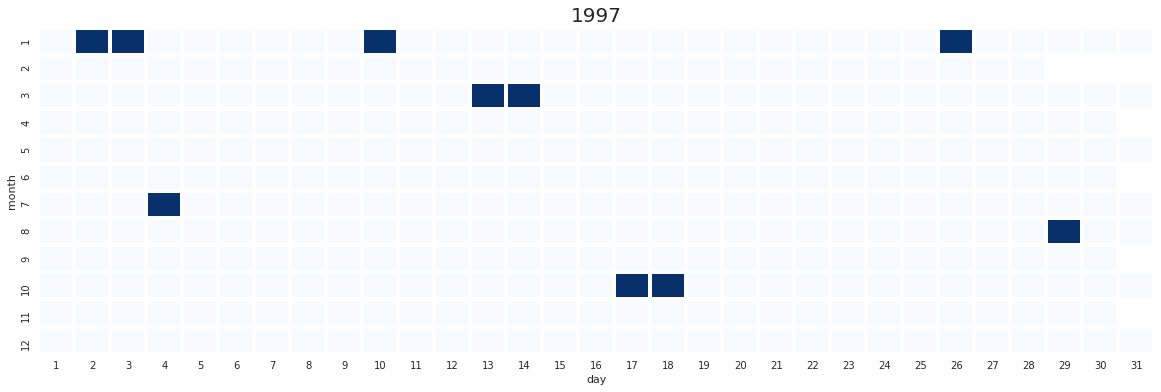

In [6]:
for x in range(1997,1998):
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,6))
    
    sns.heatmap(pt_june_gloom_df.xs(x, level='year', axis=1), linewidth=3, 
                cmap='Blues', cbar=False)
    plt.title(x, fontsize=20)
    plt.show()